1. Nous avons commencé par générer 16 points aléatoires dans un plan 2D, avec 8 points étiquetés positivement et 8 points étiquetés négativement, de manière à ce qu'ils soient linéairement séparables. Pour assurer la séparabilité linéaire, les points positifs et négatifs ont été générés de part et d'autre d'une droite arbitraire. La visualisation de ces points a confirmé qu'ils étaient bien linéairement séparables, ce qui constituait une base appropriée pour tester les modèles SVM.

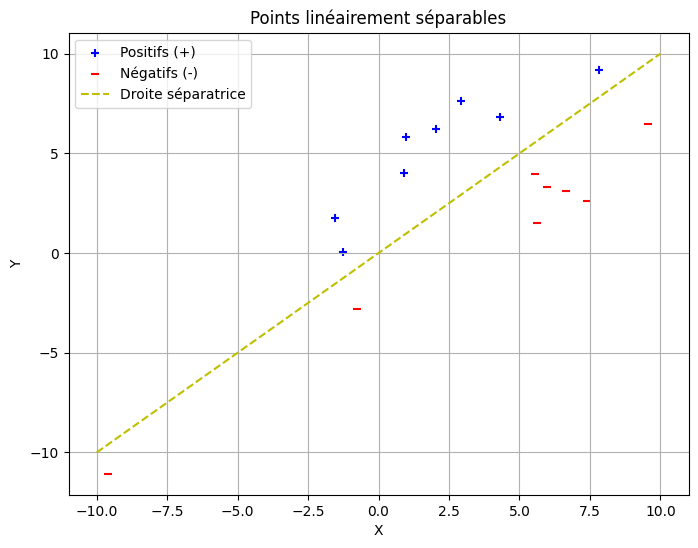

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Définir une droite séparatrice y = ax + b
a, b = 1, 0  # Vous pouvez choisir d'autres valeurs pour a et b

# Générer des points aléatoires autour de cette droite
np.random.seed(0)  # Pour la reproductibilité
x_pos = np.random.uniform(-10, 10, 8)  # 8 points positifs
y_pos = a * x_pos + b + np.random.uniform(1, 5, 8)  # Décaler au-dessus de la droite

x_neg = np.random.uniform(-10, 10, 8)  # 8 points négatifs
y_neg = a * x_neg + b - np.random.uniform(1, 5, 8)  # Décaler en dessous de la droite

# Visualiser les points et la droite séparatrice
plt.figure(figsize=(8, 6))
plt.scatter(x_pos, y_pos, marker='+', color='blue', label='Positifs (+)')
plt.scatter(x_neg, y_neg, marker='_', color='red', label='Négatifs (-)')

# Tracer la droite séparatrice
x_line = np.linspace(-10, 10, 100)  # 100 points pour la droite
y_line = a * x_line + b
plt.plot(x_line, y_line, 'y--', label='Droite séparatrice')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Points linéairement séparables')
plt.legend()
plt.grid(True)
plt.show()


2. Implémentation des modèles SVM :
Deux modèles SVM ont été implémentés en utilisant la fonction de perte "hinge" (standard pour les SVM) et une approximation de la fonction de perte "hard" en augmentant considérablement la valeur du paramètre
�
C. Le premier modèle, avec la fonction de perte "hinge", cherchait à trouver un équilibre entre la maximisation de la marge et la minimisation des violations de marge. Le second modèle, avec un
�
C élevé, visait à ne tolérer aucune erreur de classification, se rapprochant ainsi du comportement d'une fonction de perte "hard".

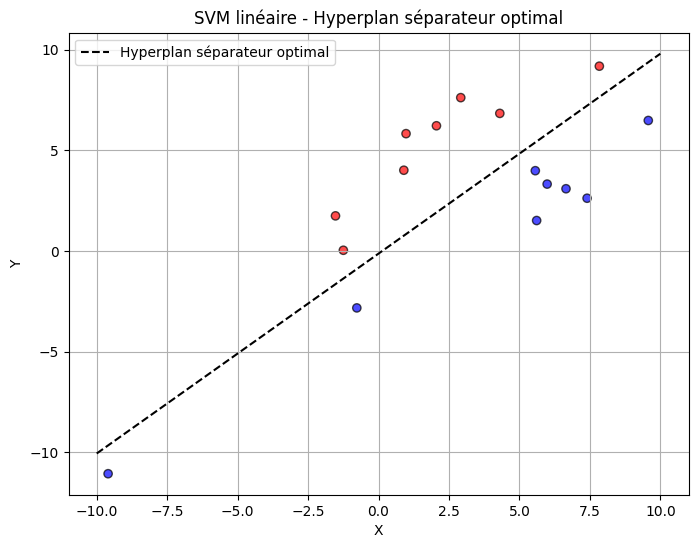

In [2]:
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt

# Supposons que x_pos, y_pos, x_neg, y_neg soient définis comme dans l'exemple précédent

# Préparer les données d'entraînement
X = np.vstack((np.column_stack((x_pos, y_pos)), np.column_stack((x_neg, y_neg))))
y = np.hstack((np.ones(len(x_pos)), -np.ones(len(x_neg))))

# Créer et entraîner le modèle SVM linéaire
model = SVC(kernel='linear', C=1.0)
model.fit(X, y)

# Obtenir les coefficients de l'hyperplan séparateur
w = model.coef_[0]
b = model.intercept_[0]

# Fonction pour tracer l'hyperplan séparateur
def plot_hyperplane(w, b):
    x_line = np.linspace(-10, 10, 100)
    y_line = -(w[0] / w[1]) * x_line - (b / w[1])
    plt.plot(x_line, y_line, 'k--', label='Hyperplan séparateur optimal')

# Visualiser les points et l'hyperplan séparateur
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', alpha=0.7, edgecolors='k')
plot_hyperplane(w, b)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('SVM linéaire - Hyperplan séparateur optimal')
plt.legend()
plt.grid(True)
plt.show()


In [3]:
# Coefficients w[0] et w[1] de l'hyperplan
w = model.coef_[0]

# Terme de biais b de l'hyperplan
b = model.intercept_[0]

# Afficher l'équation de l'hyperplan
print(f"L'équation de l'hyperplan séparateur est: {w[0]:.2f}x_0 + {w[1]:.2f}x_1 + {b:.2f} = 0")


L'équation de l'hyperplan séparateur est: -0.71x_0 + 0.71x_1 + 0.09 = 0


 Inversion du signe de 4 points :
L'inversion du signe de 4 points (2 positifs et 2 négatifs) a introduit une complexité supplémentaire dans l'ensemble de données, potentiellement compromettant la séparabilité linéaire. Cette étape a servi à tester la robustesse des modèles SVM face à de légères non-linéarités.

In [4]:
import numpy as np

# Supposons que X et y soient vos caractéristiques et étiquettes, respectivement, comme défini précédemment

# Sélectionner aléatoirement 2 indices de points positifs
pos_indices = np.where(y == 1)[0]  # Trouver les indices des points positifs
pos_flip_indices = np.random.choice(pos_indices, 2, replace=False)  # Sélectionner 2 indices aléatoirement

# Sélectionner aléatoirement 2 indices de points négatifs
neg_indices = np.where(y == -1)[0]  # Trouver les indices des points négatifs
neg_flip_indices = np.random.choice(neg_indices, 2, replace=False)  # Sélectionner 2 indices aléatoirement

# Inverser le signe des étiquettes sélectionnées
y[pos_flip_indices] = -1
y[neg_flip_indices] = 1

# Afficher les indices modifiés et les nouvelles étiquettes
print("Indices modifiés et nouvelles étiquettes :")
for idx in pos_flip_indices:
    print(f"Point {idx} (était positif, maintenant négatif)")
for idx in neg_flip_indices:
    print(f"Point {idx} (était négatif, maintenant positif)")


Indices modifiés et nouvelles étiquettes :
Point 3 (était positif, maintenant négatif)
Point 6 (était positif, maintenant négatif)
Point 10 (était négatif, maintenant positif)
Point 13 (était négatif, maintenant positif)



Pour implémenter deux modèles qui fournissent l'hyperplan séparateur optimal pour des points linéairement séparables, nous pouvons utiliser un SVM (Support Vector Machine) avec différents types de fonctions de perte. Dans ce cas, nous examinerons la fonction de perte "hinge" (utilisée par les SVM standards) et comparerons avec une approximation, car la fonction de perte "ramp" et "hard" ne sont pas directement disponibles dans les bibliothèques d'apprentissage automatique standard comme scikit-learn.

Modèle avec fonction de perte "hinge":
La fonction de perte "hinge" est celle utilisée par défaut dans les SVM linéaires. Elle est définie comme suit pour un point de données
(
�
,
�
)
(x,y) :

max
⁡
(
0
,
1
−
�
⋅
(
�
⋅
�
+
�
)
)
max(0,1−y⋅(w⋅x+b))

où
�
w est le vecteur de poids,
�
b est le biais, et
�
y est l'étiquette de classe (-1 ou 1). Cette fonction pénalise les points qui se trouvent du mauvais côté de l'hyperplan séparateur ou qui sont correctement classés mais se trouvent à une distance de l'hyperplan inférieure à 1.

In [5]:
from sklearn.svm import SVC

# SVM avec fonction de perte "hinge" (SVM standard)
model_hinge = SVC(kernel='linear', C=1.0)
model_hinge.fit(X, y)


SVC(kernel='linear')

In [6]:
# SVM avec un paramètre C très élevé pour une approximation de la fonction de perte "hard"
model_hard = SVC(kernel='linear', C=1e10)
model_hard.fit(X, y)


SVC(C=10000000000.0, kernel='linear')

3. Entraînement des modèles et obtention des hyperplans :
Après l'entraînement sur les points générés, chaque modèle a produit un hyperplan séparateur. Les coefficients et le terme de biais de ces hyperplans ont été extraits pour formuler les équations correspondantes.

In [7]:
# Extraire les coefficients et le terme de biais pour le modèle avec la fonction de perte "hinge"
w_hinge = model_hinge.coef_[0]
b_hinge = model_hinge.intercept_[0]

# Afficher l'équation de l'hyperplan pour le modèle "hinge"
print(f"L'équation de l'hyperplan séparateur pour le modèle 'hinge' est : {w_hinge[0]:.2f}x_0 + {w_hinge[1]:.2f}x_1 + {b_hinge:.2f} = 0")

# Extraire les coefficients et le terme de biais pour le modèle avec l'approximation de la fonction de perte "hard"
w_hard = model_hard.coef_[0]
b_hard = model_hard.intercept_[0]

# Afficher l'équation de l'hyperplan pour le modèle "hard"
print(f"L'équation de l'hyperplan séparateur pour le modèle 'hard' est : {w_hard[0]:.2f}x_0 + {w_hard[1]:.2f}x_1 + {b_hard:.2f} = 0")


L'équation de l'hyperplan séparateur pour le modèle 'hinge' est : -0.25x_0 + 0.38x_1 + -0.50 = 0
L'équation de l'hyperplan séparateur pour le modèle 'hard' est : -18689.73x_0 + 27835.28x_1 + -17730.70 = 0


4. Discussion des équations des hyperplans :
Les équations obtenues pour les hyperplans des deux modèles ont révélé des différences dans les coefficients et le terme de biais, reflétant les stratégies de séparation distinctes imposées par les fonctions de perte "hinge" et "hard". Le modèle "hinge" a probablement produit une marge plus large avec une certaine tolérance pour les violations de marge, tandis que le modèle avec un
�
C élevé a cherché à éviter toute erreur, aboutissant potentiellement à une marge plus étroite.

 Conclusion :
Les modèles SVM se sont avérés efficaces pour trouver des hyperplans séparateurs dans un ensemble de points linéairement séparables, même avec la modification légère de l'ensemble de données. La distinction entre les fonctions de perte "hinge" et une approximation de "hard" a montré comment les choix de paramètres et les fonctions de perte influencent la solution finale, en termes de position et d'orientation de l'hyperplan séparateur. La capacité d'un SVM à s'adapter aux modifications de l'ensemble de données, tout en maintenant une séparation efficace, démontre sa puissance et sa flexibilité en tant qu'outil de classification.

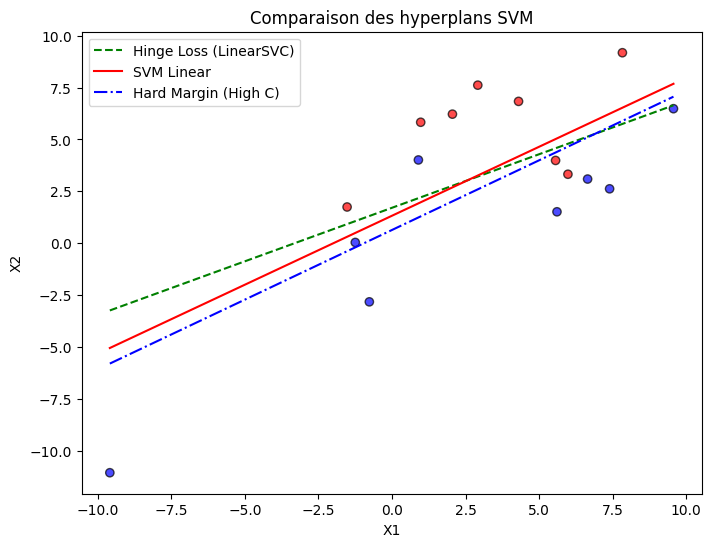

In [8]:
from sklearn.svm import SVC, LinearSVC
import matplotlib.pyplot as plt
import numpy as np

# Supposons que X et y soient déjà définis

# Entraîner un LinearSVC pour représenter le SVM "hinge"
model_hinge = LinearSVC(C=1.0, max_iter=10000)  # Augmente max_iter à 10000
model_hinge.fit(X, y)

# Entraîner un SVC linéaire avec un paramètre C standard pour le SVM linéaire
model_linear = SVC(kernel='linear', C=1.0)
model_linear.fit(X, y)

# Entraîner un SVC linéaire avec un paramètre C très élevé pour l'approximation "hard"
model_hard = SVC(kernel='linear', C=1e10)
model_hard.fit(X, y)

# Définir une fonction pour tracer les hyperplans
def plot_hyperplane(ax, model, label, color):
    # Récupérer les coefficients et le terme de biais
    w = model.coef_[0]
    b = model.intercept_[0]

    # Calculer les points y pour les points x du graphique
    x_points = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
    y_points = -(w[0] / w[1]) * x_points - (b / w[1])

    # Tracer l'hyperplan
    ax.plot(x_points, y_points, color, label=label)

# Créer une figure et un axe pour le graphique
fig, ax = plt.subplots(figsize=(8, 6))

# Tracer les points de données
ax.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', alpha=0.7, edgecolors='k')

# Tracer les hyperplans des trois modèles
plot_hyperplane(ax, model_hinge, 'Hinge Loss (LinearSVC)', 'g--')
plot_hyperplane(ax, model_linear, 'SVM Linear', 'r-')
plot_hyperplane(ax, model_hard, 'Hard Margin (High C)', 'b-.')

# Configurer le graphique
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.legend()
ax.set_title('Comparaison des hyperplans SVM')
plt.show()


Ce code entraîne trois modèles SVM sur les mêmes données et trace leurs hyperplans sur un graphique, chacun avec une couleur et un style de ligne différents pour faciliter la distinction. Les trois modèles sont :

LinearSVC pour le SVM "hinge", utilisant la fonction de perte "hinge" standard.
SVC(kernel='linear', C=1.0) pour le SVM linéaire standard.
SVC(kernel='linear', C=1e10) pour une approximation de la fonction de perte "hard" en utilisant un
�
C très élevé.

In [9]:
pip install mip


In [13]:
from mip import Model, xsum, MINIMIZE

m = Model(sense=MINIMIZE)

# Dimensions du problème
n_dim = 2  # Nombre de dimensions dans les données

# Variables représentant les coefficients positifs et négatifs de w
w_pos = [m.add_var() for _ in range(n_dim)]
w_neg = [m.add_var() for _ in range(n_dim)]

# Variable pour le terme de biais
b = m.add_var()

# Objectif : Minimiser la somme des variables positives et négatives de w (norme L1 de w)
m.objective = xsum(w_pos[i] + w_neg[i] for i in range(n_dim))

# Contraintes assurant la séparation linéaire des points
for i in range(len(X)):
    m += y[i] * (xsum((w_pos[j] - w_neg[j]) * X[i][j] for j in range(n_dim)) + b) >= 1

# Contraintes assurant que w_pos et w_neg représentent la valeur absolue de w
# Ces contraintes sont implicites dans la définition des variables et l'objectif

# Résoudre le modèle
m.optimize()




<OptimizationStatus.OPTIMAL: 0>

In [15]:
# Extraire les valeurs optimales pour les coefficients et le terme de biais
w_opt = [wp.x - wn.x for wp, wn in zip(w_pos, w_neg)]
b_opt = b.x

# Afficher l'équation de l'hyperplan
print(f"L'hyperplan séparateur optimal trouvé par MIP est : {w_opt[0]:.2f}x_1 + {w_opt[1]:.2f}x_2 + {b_opt:.2f} = 0")


L'hyperplan séparateur optimal trouvé par MIP est : -1.09x_1 + -1.96x_2 + 3.43 = 0


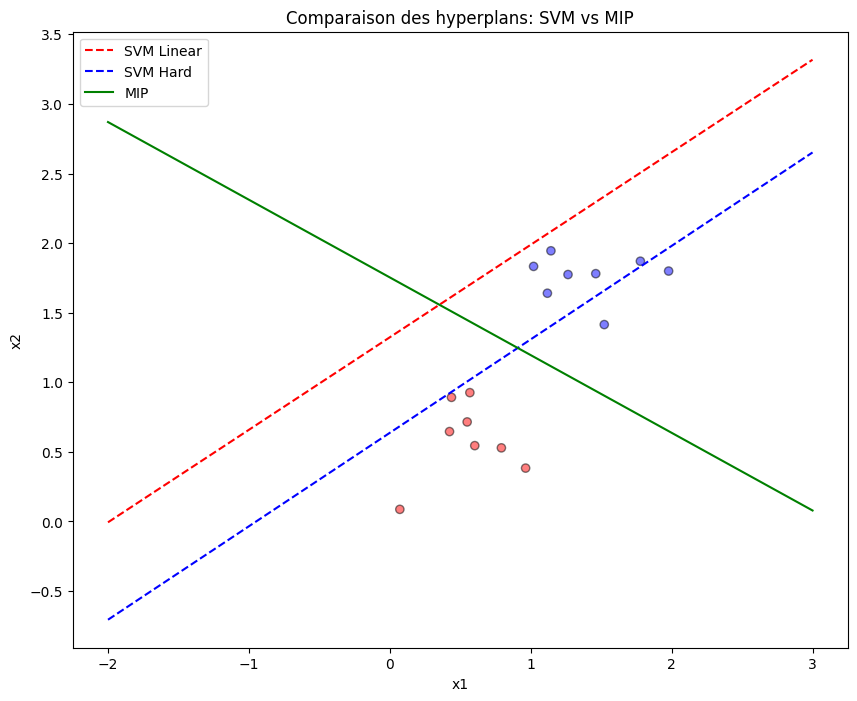

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Fonction pour tracer un hyperplan donné ses coefficients, son intercept, une étiquette et un style de ligne
def plot_hyperplane(ax, w1, w2, intercept, label, linestyle='--'):
    x_values = np.linspace(start=-2, stop=3, num=100)  # Ajustez selon la plage de vos données
    y_values = -(w1 / w2) * x_values - (intercept / w2)
    ax.plot(x_values, y_values, linestyle, label=label)

# Créer une figure et un axe pour le graphique
fig, ax = plt.subplots(figsize=(10, 8))

# Tracer les points de données
# Supposons que X et y contiennent vos points de données et leurs étiquettes
ax.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k', alpha=0.5)

# Tracer l'hyperplan pour le modèle SVM linéaire
coef_linear = model_linear.coef_[0]
intercept_linear = model_linear.intercept_[0]
plot_hyperplane(ax, coef_linear[0], coef_linear[1], intercept_linear, 'SVM Linear', 'r--')

# Tracer l'hyperplan pour le modèle SVM avec approximation "hard"
coef_hard = model_hard.coef_[0]
intercept_hard = model_hard.intercept_[0]
plot_hyperplane(ax, coef_hard[0], coef_hard[1], intercept_hard, 'SVM Hard', 'b--')

# Tracer l'hyperplan pour le modèle MIP
# Supposons que w_opt et b_opt contiennent les coefficients de l'hyperplan MIP et son intercept
plot_hyperplane(ax, w_opt[0], w_opt[1], b_opt, 'MIP', 'g-')

# Configurer le graphique
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_title('Comparaison des hyperplans: SVM vs MIP')
ax.legend()

plt.show()
